Exercise 3

Keras functional API. So far we've always used the Sequential model API in Keras. However, Keras also offers a Functional API, which is much more powerful. You can find its documentation here. Let's see how we can leverage it.

- define an input layer called inputs
- define two hidden layers as before, one with 8 nodes, one with 5 nodes
- define a second_to_last layer with 2 nodes
- define an output layer with 3 nodes
- create a model that connect input and output
- train it and make sure that it converges
- define a function between inputs and second_to_last layer
- recalculate the features and plot them

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

import keras.backend as kb
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.initializers import he_normal
from keras.optimizers import Adam

In [21]:
data = pd.read_csv(filepath_or_buffer=r'./wine.csv')
stdsclr = StandardScaler()

X = data.drop(columns=['Class'])
X = stdsclr.fit_transform(X)
y = data['Class']
y = pd.get_dummies(y)

In [43]:
input_layer = Input(shape=(X.shape[1], ), name='input_layer')
first_layer = Dense(units=8, activation='sigmoid', kernel_initializer=he_normal(seed=None), name='first_layer') (input_layer)
second_layer = Dense(units=5, activation='sigmoid', kernel_initializer=he_normal(seed=None), name='second_layer') (first_layer)
second_last = Dense(units=2, activation='sigmoid', kernel_initializer=he_normal(seed=None), name='second_last') (second_layer)
output_layer = Dense(units=3, activation='sigmoid', kernel_initializer=he_normal(seed=None), name='output_layer') (second_last)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer=Adam(lr=.05), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X, y, batch_size=8, epochs=50, validation_split=.2)

Train on 142 samples, validate on 36 samples
Epoch 1/50
142/142 [==============================] - 3s 18ms/step - loss: 0.9669 - acc: 0.5986 - val_loss: 1.6916 - val_acc: 0.0000e+00
Epoch 2/50
142/142 [==============================] - 0s 532us/step - loss: 0.7019 - acc: 0.8803 - val_loss: 2.1972 - val_acc: 0.0000e+00
Epoch 3/50
142/142 [==============================] - 0s 535us/step - loss: 0.4960 - acc: 0.9014 - val_loss: 2.8498 - val_acc: 0.0000e+00
Epoch 4/50
142/142 [==============================] - 0s 507us/step - loss: 0.3428 - acc: 0.9155 - val_loss: 1.8321 - val_acc: 0.0000e+00
Epoch 5/50
142/142 [==============================] - 0s 563us/step - loss: 0.3054 - acc: 0.9085 - val_loss: 1.9992 - val_acc: 0.0000e+00
Epoch 6/50
142/142 [==============================] - 0s 507us/step - loss: 0.3018 - acc: 0.9085 - val_loss: 2.2993 - val_acc: 0.0000e+00
Epoch 7/50
142/142 [==============================] - 0s 563us/step - loss: 0.2666 - acc: 0.9155 - val_loss: 2.1972 - val_acc: 0

In [44]:
function = kb.function(inputs=[input_layer], outputs=[output_layer])
last_layer_dim = function([X])[0]

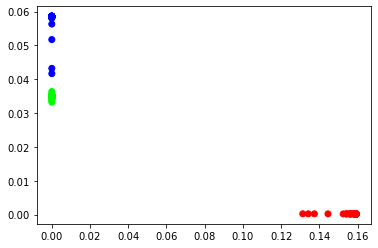

In [45]:
plt.scatter(last_layer_dim[:,0], last_layer_dim[:,1], c=y)